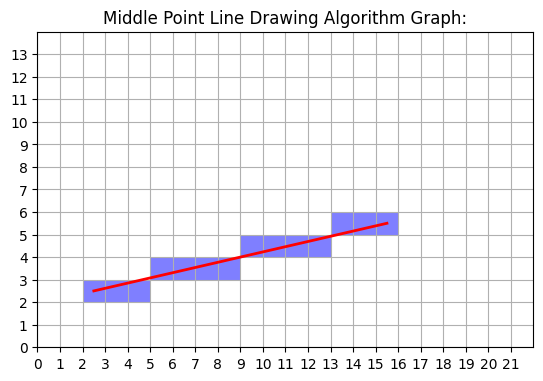

In [10]:
import matplotlib.pyplot as plt

def midpoint_line(x0, y0, x1, y1):
    points = []
    dx = x1 - x0
    dy = y1 - y0

    # Handle lines drawn from right to left by swapping points
    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0
        dx = x1 - x0
        dy = y1 - y0

    x, y = x0, y0

    # Determine slope case
    if abs(dy) <= abs(dx):
        # Slope <= 1: iterate over x
        d = abs(dy) - (abs(dx) / 2)
        yi = 1 if dy >= 0 else -1  # Handle negative slope

        points.append((x, y))

        while x < x1:
            x += 1
            if d < 0:
                d += abs(dy)
            else:
                d += abs(dy) - abs(dx)
                y += yi
            points.append((x, y))

    else:
        # Slope > 1: iterate over y
        d = abs(dx) - (abs(dy) / 2)
        xi = 1 if dx >= 0 else -1  # Handle negative slope

        points.append((x, y))

        # Make sure to iterate from min y to max y
        if y0 > y1:
            y, y1 = y1, y
            x = x0  # Reset x to start point x0

        while y < y1:
            y += 1
            if d < 0:
                d += abs(dx)
            else:
                d += abs(dx) - abs(dy)
                x += xi
            points.append((x, y))

    return points

# Example usage with plot:

start_x, start_y = 2.5, 2.5
end_x, end_y = 15.5, 5.5

points = midpoint_line(start_x, start_y, end_x, end_y)

fig, ax = plt.subplots()
ax.set_xticks(range(0, 22))
ax.set_yticks(range(0, 14))
ax.grid(True)

# Draw chosen pixels
for (x, y) in points:
    rect = plt.Rectangle((x-0.5, y-0.5), 1, 1, facecolor='blue', alpha=0.5)
    ax.add_patch(rect)

# Draw red line through centers
plt.plot([start_x, end_x], [start_y, end_y], color='red', linewidth=2)

plt.xlim(0, 22)
plt.ylim(0, 14)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Middle Point Line Drawing Algorithm Graph:")
plt.show()
